## Import the packages necessary to run this python notebook
We will use *scanpy* as the main analysis tool for the analysis. Scanpy has a comprehensive [manual webpage](https://scanpy.readthedocs.io/en/stable/) that includes many different tutorial you can use for further practicing. Scanpy is used in the discussion paper and the tutorial paper of this course. 
An alternative and well-established tool for R users is [Seurat](https://satijalab.org/seurat/). However, scanpy is mainatined and updated by a wider community with many of the latest developed tools.

In [1]:
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


## Loading and understanding the dataset

There are many different possible formats. Each format has a dedicated reading command in scanpy, for example `read_h5ad`, `read_10X` ....

Each dataset is opened and an `Annotated data` object is created. This object contains:


*   The data matrix `adata.X` of size $N\_cells \times N\_genes$
*   Vectors of cells-related variables in the dataframe `adata.obs`
* Vectors of genes-related variables in the dataframe `adata.var`
* Matrices of size $N\_cells \times N\_genes$ in `adata.layers`
* Matrices where each line is cell-related in `adata.obsm`
* Matrices where each line is gene-related in `adata.varm`
* Anything else that must be saved is in `adata.uns`

The cells are called observations (obs) and the genes variables (var).

![alt text](https://falexwolf.de/img/scanpy/anndata.svg)


https://www.nature.com/articles/s41598-020-67513-5
useful for filtering explanation with spliced/unspliced reads

In [3]:
sample_2 = sc.read_10x_mtx('../data/cellranger/cellranger_sample2/outs/filtered_feature_bc_matrix/', cache=True)

In [4]:
spl_sample_2 = scv.read_loom('../data/cellranger/velocyto_sample2/possorted_genome_bam.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
del spl_sample_2.layers['matrix']

In [7]:
sample_2 = scv.utils.merge( sample_2, spl_sample_2 )

In [8]:
del spl_sample_2

In [9]:
sample_2

AnnData object with n_obs × n_vars = 8583 × 36601
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [10]:
sample_2.write('../data/notebooks_data/sample_2.h5ad')

... storing 'feature_types' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


We do the filtering one dataset at a time

In [99]:
sample_2 = sc.read('../data/notebooks_data/sample_2.h5ad')

In [100]:
sample_2.X = np.array(sample_2.X.todense()).copy()

In [101]:
sc.preprocessing.calculate_qc_metrics(sample_2, inplace=True)

In [102]:
sample_2

AnnData object with n_obs × n_vars = 8583 × 36601
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [103]:
sample_2.obs

,initial_size_spliced,initial_size_unspliced,initial_size,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCTGAGATCCTGT,524,154,524.0,473,6.161207,694.0,6.543912,32.853026,46.253602,60.662824,100.000000
AAACCTGAGCCTATGT,5980,502,5980.0,2016,7.609367,6868.0,8.834774,47.408270,53.567268,61.560862,74.635993
AAACCTGAGCTTTGGT,7183,2013,7183.0,3670,8.208219,9188.0,9.125762,17.599042,25.555072,35.154549,51.273400
AAACCTGAGGATGGTC,3351,351,3351.0,2175,7.685244,4021.0,8.299535,13.603581,21.139020,32.131311,51.927381
AAACCTGAGTACGACG,2595,212,2595.0,1622,7.392032,3237.0,8.082711,20.883534,30.552981,42.570281,63.608279
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCACGACTA,5307,1885,5307.0,3234,8.081784,6918.0,8.842027,13.356461,20.381613,29.719572,46.863255
TTTGTCATCAGTTTGG,2192,562,2192.0,1312,7.180070,2895.0,7.971086,32.918826,44.006908,55.613126,71.951641
TTTGTCATCCAAACTG,1199,115,1199.0,1009,6.917706,1461.0,7.287560,20.123203,29.295003,42.984257,65.160849
TTTGTCATCCGTCAAA,2065,663,2065.0,1399,7.244228,2712.0,7.905810,28.945428,40.007375,50.884956,66.851032


In [104]:
sample_2.var

,gene_ids,feature_types,Accession,Chromosome,End,Start,Strand,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,ENSG00000243485,1,31109,29554,+,13,0.001515,0.001513,99.848538,13.0,2.639057
FAM138A,ENSG00000237613,Gene Expression,ENSG00000237613,1,36081,34554,-,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,ENSG00000186092,1,71585,65419,+,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,ENSG00000238009,1,133723,89295,-,40,0.004777,0.004766,99.533962,41.0,3.737670
AL627309.3,ENSG00000239945,Gene Expression,ENSG00000239945,1,91105,89551,-,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,ENSG00000277836,KI270728.1,1271271,1270984,+,0,0.000000,0.000000,100.000000,0.0,0.000000
AC023491.2,ENSG00000278633,Gene Expression,ENSG00000278633,KI270731.1,13001,10598,-,587,0.249680,0.222887,93.160899,2143.0,7.670429
AC007325.1,ENSG00000276017,Gene Expression,ENSG00000276017,KI270734.1,74814,72411,+,212,0.040196,0.039409,97.530001,345.0,5.846439
AC007325.4,ENSG00000278817,Gene Expression,ENSG00000278817,KI270734.1,137392,131494,+,1949,0.436910,0.362495,77.292322,3750.0,8.229777


In [105]:
sample_2.var['Chromosome'].value_counts()

1             3410
2             2541
11            2065
19            2027
17            1992
12            1928
3             1893
6             1827
5             1811
7             1686
16            1649
4             1533
8             1495
14            1474
10            1394
9             1319
15            1267
X             1148
20             964
22             901
13             788
18             781
21             555
Y              111
M               13
KI270728.1       6
KI270727.1       4
KI270734.1       3
GL000195.1       2
KI270726.1       2
GL000194.1       2
KI270713.1       2
KI270711.1       1
GL000219.1       1
GL000218.1       1
KI270731.1       1
GL000213.1       1
GL000205.2       1
GL000009.2       1
KI270721.1       1
Name: Chromosome, dtype: int64

In [106]:
sample_2.var['mean_counts']

MIR1302-2HG    0.001515
FAM138A        0.000000
OR4F5          0.000000
AL627309.1     0.004777
AL627309.3     0.000000
                 ...   
AC141272.1     0.000000
AC023491.2     0.249680
AC007325.1     0.040196
AC007325.4     0.436910
AC007325.2     0.000233
Name: mean_counts, Length: 36601, dtype: float32

In [107]:
MT = ['M' in i for i in sample_2.var['Chromosome']]
perc_mito = np.sum( sample_2[:,MT].X, 1 ) / np.sum( sample_2.X, 1 )
sample_2.obs['perc_mito'] = perc_mito.copy()

In [108]:
perc_mito

ArrayView([0.05043228, 0.00043681, 0.02187636, ..., 0.        ,
           0.01585546, 0.01675906], dtype=float32)

In [109]:
prop_spliced = np.sum(sample_2.layers['spliced'].todense(), 1).A1 / ( np.sum(sample_2.layers['spliced'].todense()+sample_2.layers['unspliced'].todense(), 1).A1 )

In [110]:
prop_spliced

array([0.77286136, 0.92255477, 0.78110048, ..., 0.91248097, 0.75696481,
       0.69912523])

In [111]:
sample_2.obs['prop_spliced'] = pd.Series(prop_spliced, index=sample_2.obs_names)

In [112]:
prop_unspliced = np.sum(sample_2.layers['unspliced'].todense(), 1).A1 / ( np.sum(sample_2.layers['spliced'].todense()+sample_2.layers['unspliced'].todense(), 1).A1 )

In [113]:
prop_unspliced

array([0.22713864, 0.07744523, 0.21889952, ..., 0.08751903, 0.24303519,
       0.30087477])

In [114]:
sample_2.obs['prop_unspliced'] = pd.Series(prop_unspliced, index=sample_2.obs_names)

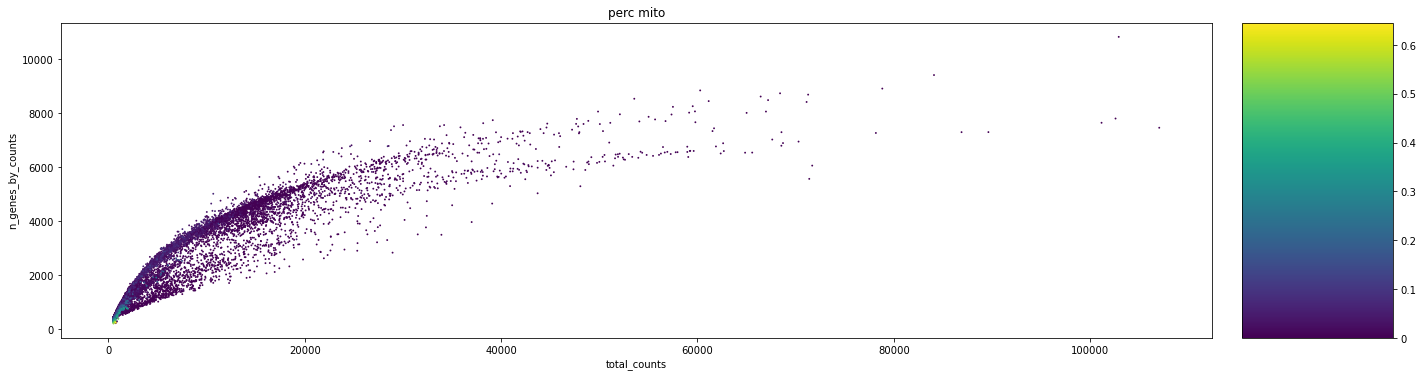

In [115]:
sc.pl.scatter(sample_2, x='total_counts', y='n_genes_by_counts', color='perc_mito')

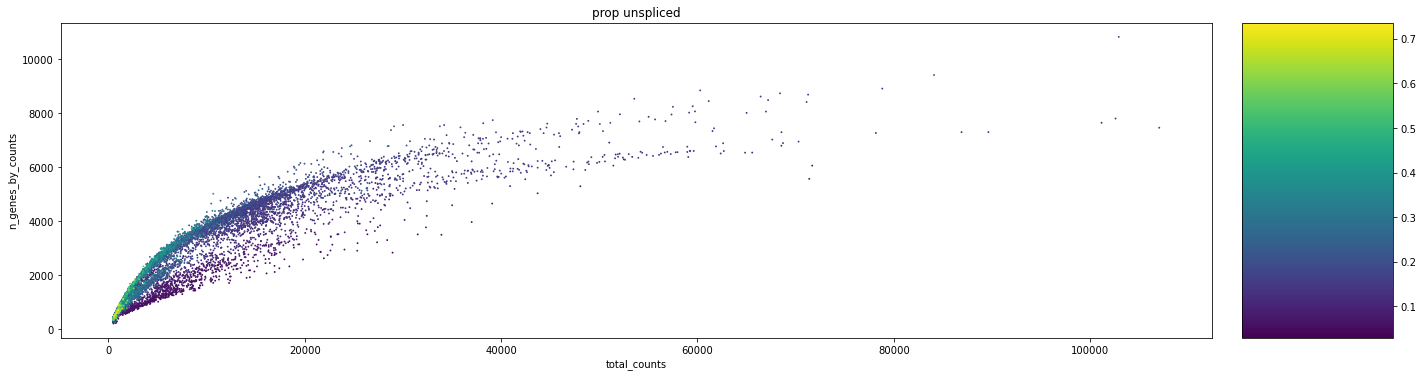

In [116]:
sc.pl.scatter(sample_2, x='total_counts', y='n_genes_by_counts', color='prop_unspliced')

Text(0.5, 1.0, 'Distribution of MT genes percentage per cell')

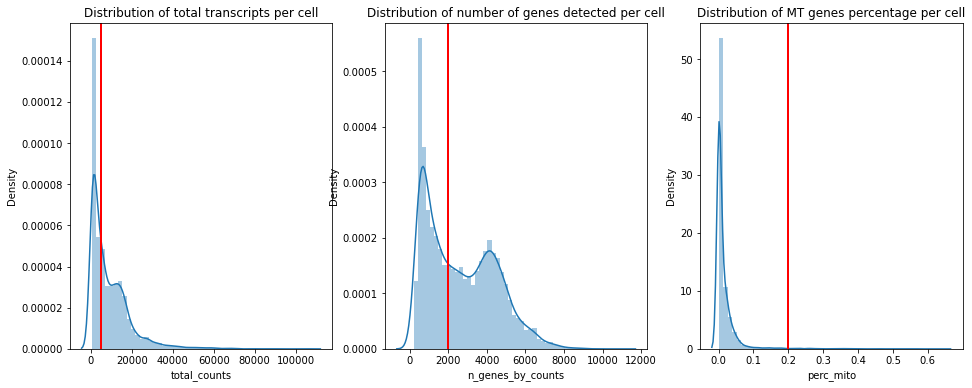

In [117]:
plt.rcParams['figure.figsize'] = (16,6)
f, ax = plt.subplots(1,3)

sns.distplot(sample_2.obs['total_counts'], ax=ax[0], bins=50)
ax[0].axvline(5000, color='red', linewidth=2)
ax[0].set_title('Distribution of total transcripts per cell')

sns.distplot(sample_2.obs['n_genes_by_counts'], ax=ax[1], bins=50)
ax[1].axvline(2000, color='red', linewidth=2)
#ax[1].axvline(3000, color='red', linewidth=2)
ax[1].set_title('Distribution of number of genes detected per cell')

sns.distplot(sample_2.obs['perc_mito'], ax=ax[2], bins=50)
ax[2].axvline(0.2, color='red', linewidth=2)
ax[2].set_title('Distribution of MT genes percentage per cell')

<AxesSubplot:xlabel='prop_spliced', ylabel='Density'>

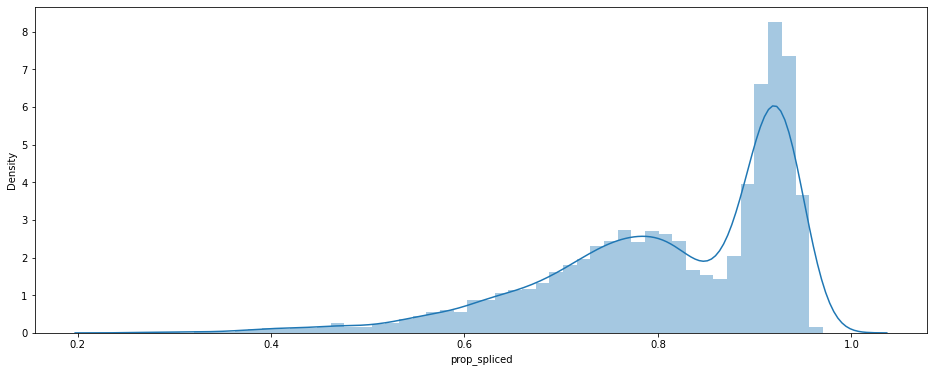

In [118]:
sns.distplot(sample_2[sample_2.obs['total_counts']<10000].obs['prop_spliced'], bins=50)

<AxesSubplot:xlabel='n_genes_by_counts', ylabel='Density'>

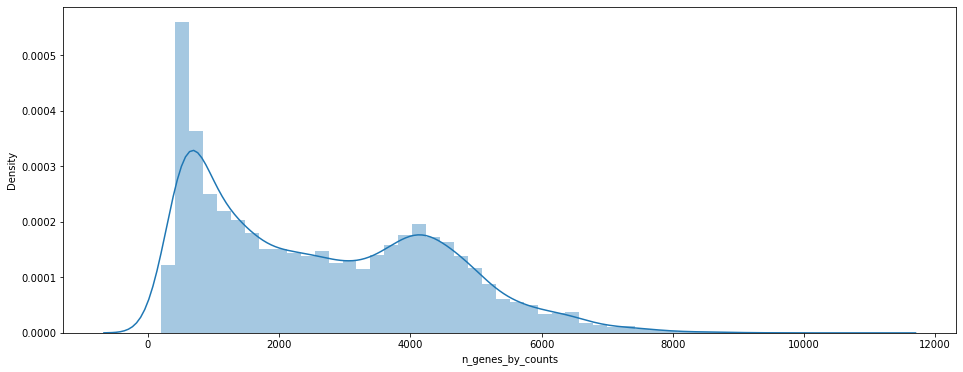

In [119]:
sns.distplot(sample_2.obs['n_genes_by_counts'], bins=50)

In [120]:
sc.preprocessing.filter_cells(sample_2, max_counts=40000)

sc.preprocessing.filter_cells(sample_2, min_counts=2000)

sc.preprocessing.filter_cells(sample_2, min_genes=1500)

sc.preprocessing.filter_cells(sample_2, max_genes=8000)

In [121]:
sc.preprocessing.filter_genes(sample_2, min_cells=10)

In [122]:
sample_2

AnnData object with n_obs × n_vars = 5252 × 25113
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'perc_mito', 'prop_spliced', 'prop_unspliced', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [123]:
sc.external.pp.scrublet(sample_2, expected_doublet_rate=0.06, threshold=.2, random_state=12345)

Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 68.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.2%


<AxesSubplot:xlabel='doublet_score', ylabel='Density'>

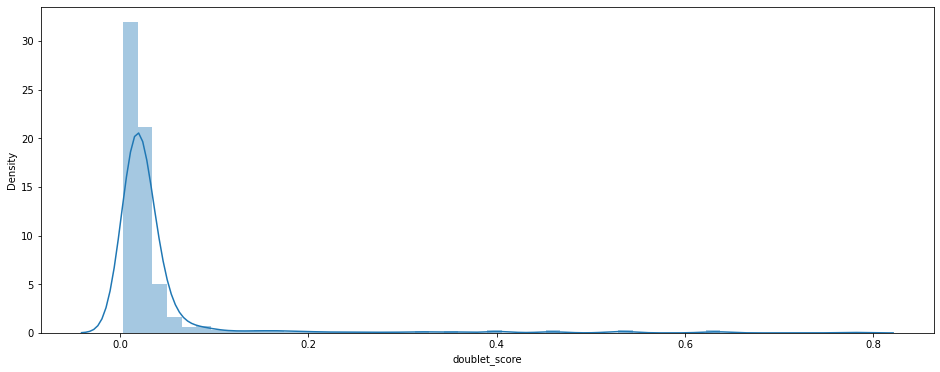

In [124]:
sns.distplot(sample_2.obs['doublet_score'])

In [125]:
sample_2 = sample_2[np.invert(sample_2.obs['predicted_doublet'])].copy()

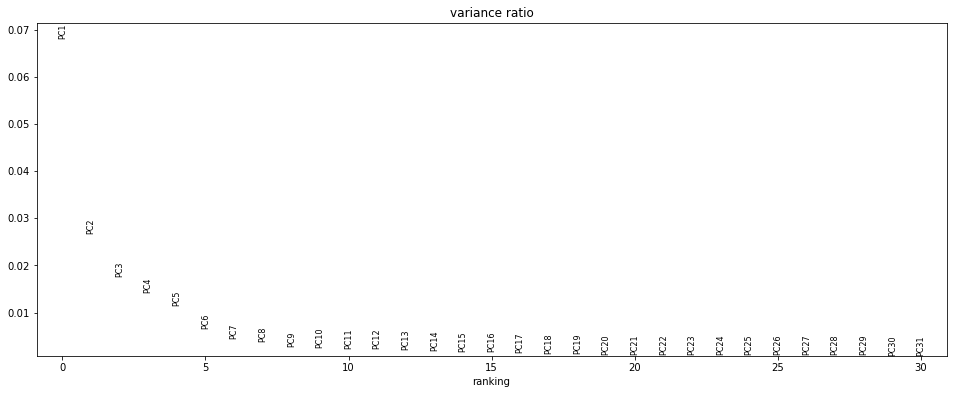

In [126]:
# save raw sample_2 matrix
sample_2.layers['raw_counts'] = sample_2.X.copy()

# TPM normalization and matrix copy
sc.pp.normalize_per_cell(sample_2)
sample_2.layers['tpm_counts'] = sample_2.X.copy()

# matrix logarithmization and copy
sc.pp.log1p(sample_2)
sample_2.layers['log_counts'] = sample_2.X.copy()

sc.pp.highly_variable_genes(sample_2, n_top_genes=15000)

sample_2.write('../data/notebooks_data/sample_2.filt.h5ad')

# standardized gene expressions and matrix copy
sc.pp.scale(sample_2)
sample_2.layers['gauss_counts'] = sample_2.X.copy()



sc.preprocessing.pca(sample_2, svd_solver='arpack', random_state=12345)

sample_2

sc.plotting.pca_variance_ratio(sample_2)

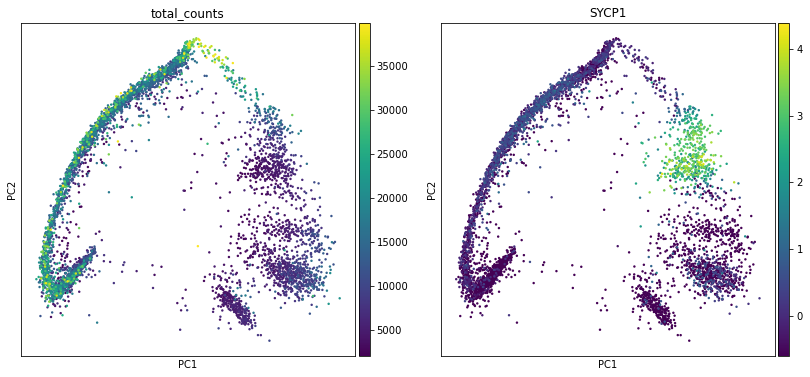

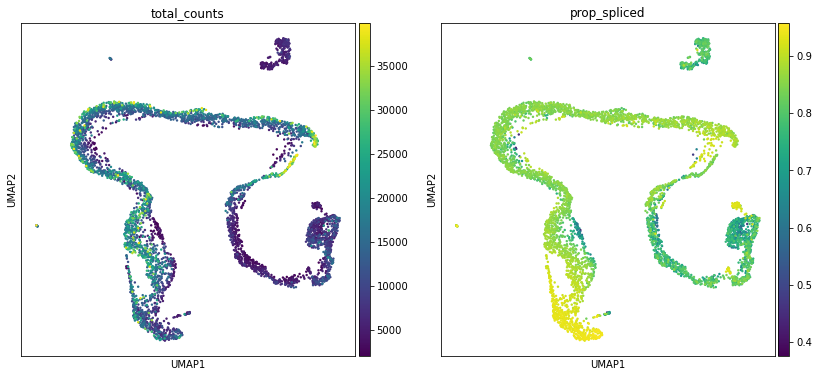

In [127]:
plt.rcParams['figure.figsize'] = (6,6) #reduce figure size
sc.pl.pca(sample_2, color=['total_counts','SYCP1'])

sc.pp.neighbors(sample_2)

sc.tools.umap(sample_2, random_state=54321, n_components=2)

sc.plotting.umap(sample_2, color=['total_counts','prop_spliced'])

Concatenate the three datasets into one, and distinguish them with an identifier (`batch_categories`) having a name for the three samples

In [66]:
data = sc.AnnData.concatenate(sample_1,sample_2,sample_3, 
                              batch_categories=["Sample_1","Sample_2","Sample_3"])

In [67]:
data.obs_names_make_unique()

In [68]:
data.obs.value_counts()

batch   
Sample_2    5438
Sample_1    5437
Sample_3    4672
dtype: int64

We calculate quality measures to fill the object `adata` with some observations and variables

In [69]:
sc.preprocessing.calculate_qc_metrics(data, inplace=True)

We can see that now `data` contains many observations (`obs`) and variables (`var`). Those can be used for filtering and analysis purpose, as well as they might be needed by some scanpy tools

In [9]:
data

AnnData object with n_obs × n_vars = 15547 × 56981
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

observations are accessed through `data.obs`, which is a dataframe, i.e. a table with indexes on the rows (cell barcodes) and column names (the observation types). One can select a specific observation type by indexing it in the table

In [10]:
data.obs

,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
GACGTGCGTTTGGCGC-Sample_1,Sample_1,7197,8.881558,35299.003906,10.471639,13.765706,20.623674,29.907709,46.482453
GTCACAACAGTATGCT-Sample_1,Sample_1,6562,8.789203,39455.000000,10.582941,16.937271,24.827028,35.080477,51.865156
CCATTCGAGGTGCAAC-Sample_1,Sample_1,7652,8.942853,42045.000000,10.646520,13.520461,20.349894,29.780970,46.103480
CGCGGTACACAACGTT-Sample_1,Sample_1,6455,8.772765,38708.000000,10.563828,16.694032,24.522073,35.031689,52.434386
GTCAAGTAGTAATCCC-Sample_1,Sample_1,6921,8.842460,47450.000000,10.767453,16.182015,23.897787,33.905093,50.921812
...,...,...,...,...,...,...,...,...,...
CTAGAGTTCGCTGATA-Sample_3,Sample_3,1405,7.248504,2970.000000,7.996654,32.424242,44.882146,56.565640,71.481465
ACGCAGCAGGCAGTCA-Sample_3,Sample_3,1408,7.250636,2873.000000,7.963460,35.850908,45.074692,54.681375,69.926763
GATCGATAGTTGAGTA-Sample_3,Sample_3,1486,7.304516,2912.000000,7.976939,28.571426,40.143992,51.785475,68.131629
ACAGCTAGTGTTAAGA-Sample_3,Sample_3,1749,7.467371,2573.000000,7.853216,17.486670,24.941246,35.081877,54.527401


In [21]:
data.obs['batch'].head() #sample label - the data contains three separate samples

GACGTGCGTTTGGCGC-Sample_1    Sample_1
GTCACAACAGTATGCT-Sample_1    Sample_1
CCATTCGAGGTGCAAC-Sample_1    Sample_1
CGCGGTACACAACGTT-Sample_1    Sample_1
GTCAAGTAGTAATCCC-Sample_1    Sample_1
Name: batch, dtype: category
Categories (3, object): ['Sample_1', 'Sample_2', 'Sample_3']

`data.var` works similarly, but now each row is referred to a gene

In [16]:
data.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
DDX11L1,1036,0.031475,0.030989,93.336335,489.335632,6.195090
WASH7P,91,0.003996,0.003988,99.414678,62.119141,4.145024
MIR6859-1,0,0.000000,0.000000,100.000000,0.000000,0.000000
MIR1302-2HG,1370,0.059563,0.057856,91.188011,926.024841,6.831980
MIR1302-2,0,0.000000,0.000000,100.000000,0.000000,0.000000
...,...,...,...,...,...,...
MT-ND6,669,0.049270,0.048095,95.696919,766.000000,6.642487
MT-TE,0,0.000000,0.000000,100.000000,0.000000,0.000000
MT-CYB,8818,5.852576,1.924625,43.281662,90990.000000,11.418516
MT-TT,0,0.000000,0.000000,100.000000,0.000000,0.000000


In [20]:
data.var['n_cells_by_counts'].head() #nr of cells where transcripts of a gene are observed

DDX11L1        1036
WASH7P           91
MIR6859-1         0
MIR1302-2HG    1370
MIR1302-2         0
Name: n_cells_by_counts, dtype: int64

## Preprocessing

We preprocess the dataset by filtering according to different quality measures and removing doublets

### Quality Filtering
Using the prefix `MT-` in the gene names we calculate the percentage of mithocondrial genes in each cell, and store this value as an observation in `adata.obs`. Cells with high MT percentage are often broken cells that spilled out mithocondrial content (in this case they will often have low gene and transcript counts), or cells captured together with residuals of broken cells (more unlikely if a good job in the sequencing lab has been done)

In [22]:
MT = ['MT-' in i for i in data.var_names]

In [23]:
perc_mito = np.sum( data[:,MT].X, 1 ) / np.sum( data.X, 1 )
data.obs['perc_mito'] = perc_mito.copy()

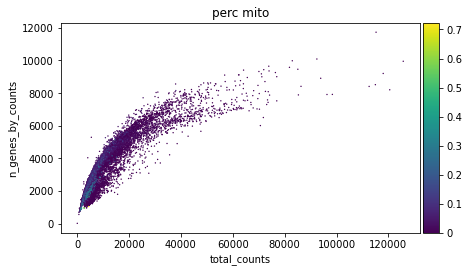

In [30]:
sc.pl.scatter(data, x='total_counts', y='n_genes_by_counts', color='perc_mito')

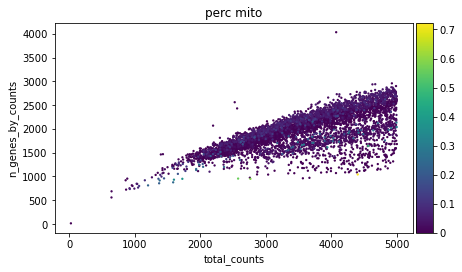

In [13]:
#same plot only looking at highest 20K transcripts per cell
sc.pl.scatter(data[data.obs['total_counts']<5000], x='total_counts', y='n_genes_by_counts', color='perc_mito')

Text(0.5, 1.0, 'Distribution of MT genes percentage per cell')

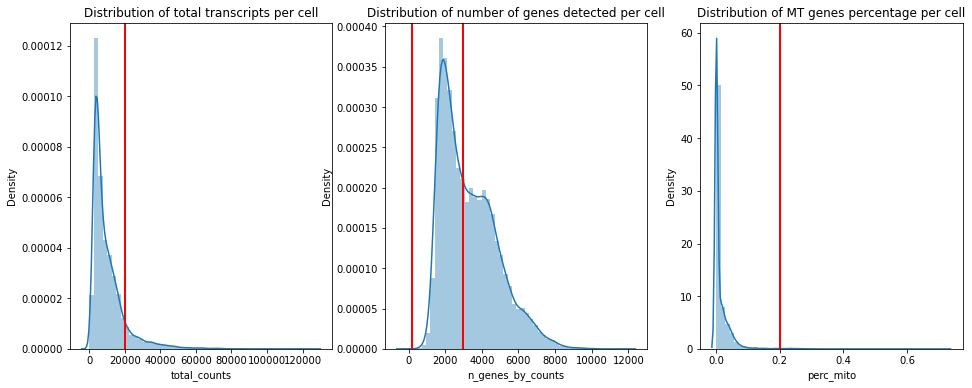

In [15]:
plt.rcParams['figure.figsize'] = (16,6)
f, ax = plt.subplots(1,3)

sns.distplot(data.obs['total_counts'], ax=ax[0], bins=50)
ax[0].axvline(20000, color='red', linewidth=2)
ax[0].set_title('Distribution of total transcripts per cell')

sns.distplot(data.obs['n_genes_by_counts'], ax=ax[1], bins=50)
ax[1].axvline(200, color='red', linewidth=2)
ax[1].axvline(3000, color='red', linewidth=2)
ax[1].set_title('Distribution of number of genes detected per cell')

sns.distplot(data.obs['perc_mito'], ax=ax[2], bins=50)
ax[2].axvline(0.2, color='red', linewidth=2)
ax[2].set_title('Distribution of MT genes percentage per cell')

<AxesSubplot:xlabel='n_genes_by_counts', ylabel='Density'>

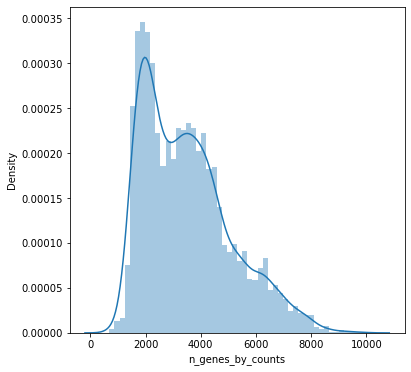

In [72]:
sns.distplot(data[ data.obs['batch']=='Sample_3' ].obs['n_genes_by_counts'], bins=50)

In [35]:
sc.preprocessing.filter_cells(data, max_counts=20000)

In [36]:
sc.preprocessing.filter_cells(data, min_counts=500)

In [37]:
sc.preprocessing.filter_cells(data, min_genes=2000)

In [38]:
sc.preprocessing.filter_cells(data, max_genes=8000)

In [40]:
data

AnnData object with n_obs × n_vars = 10274 × 56981
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'perc_mito', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'batch_colors', 'scrublet'

In [46]:
sc.external.pp.scrublet(data, expected_doublet_rate=0.03, threshold=.1, random_state=12345)

Detected doublet rate = 3.5%
Estimated detectable doublet fraction = 69.2%
Overall doublet rate:
	Expected   = 3.0%
	Estimated  = 5.0%


<AxesSubplot:xlabel='doublet_score', ylabel='Density'>

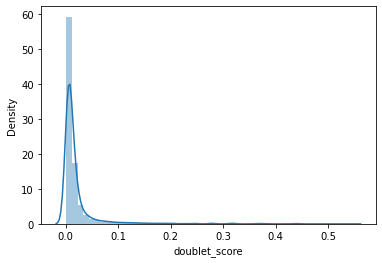

In [47]:
sns.distplot(data.obs['doublet_score'])

In [48]:
data = data[np.invert(data.obs['predicted_doublet'])].copy()

In [49]:
data

AnnData object with n_obs × n_vars = 9909 × 56981
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'perc_mito', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'batch_colors', 'scrublet'

In [50]:
# save raw data matrix
data.layers['raw_counts'] = data.X.copy()

# TPM normalization and matrix copy
sc.pp.normalize_per_cell(data)
data.layers['tpm_counts'] = data.X.copy()

# matrix logarithmization and copy
sc.pp.log1p(data)
data.layers['log_counts'] = data.X.copy()

sc.pp.highly_variable_genes(data, n_top_genes=15000)

# standardized gene expressions and matrix copy
sc.pp.scale(data)
data.layers['gauss_counts'] = data.X.copy()

In [51]:
sc.preprocessing.pca(data, svd_solver='arpack', random_state=12345)

In [52]:
data

AnnData object with n_obs × n_vars = 9909 × 56981
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'perc_mito', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'scrublet', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts', 'tpm_counts', 'log_counts', 'gauss_counts'

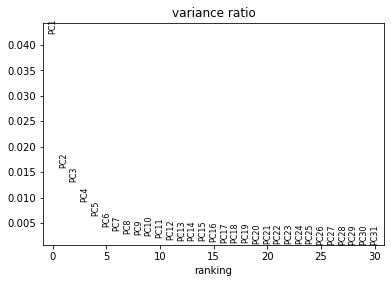

In [53]:
sc.plotting.pca_variance_ratio(data)

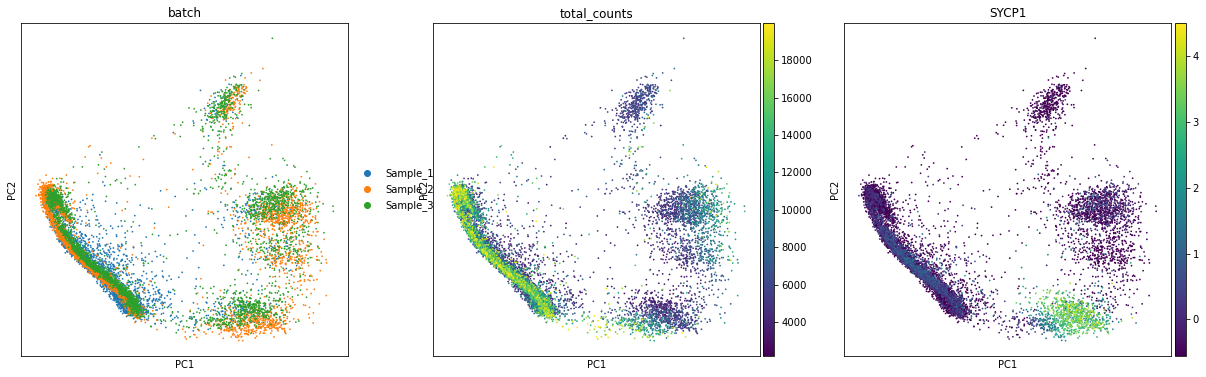

In [54]:
plt.rcParams['figure.figsize'] = (6,6) #reduce figure size
sc.pl.pca(data, color=['batch','total_counts','SYCP1'])

In [55]:
import bbknn
bbknn.bbknn(data,  batch_key='batch')

In [56]:
sc.tools.umap(data, random_state=54321, n_components=2)

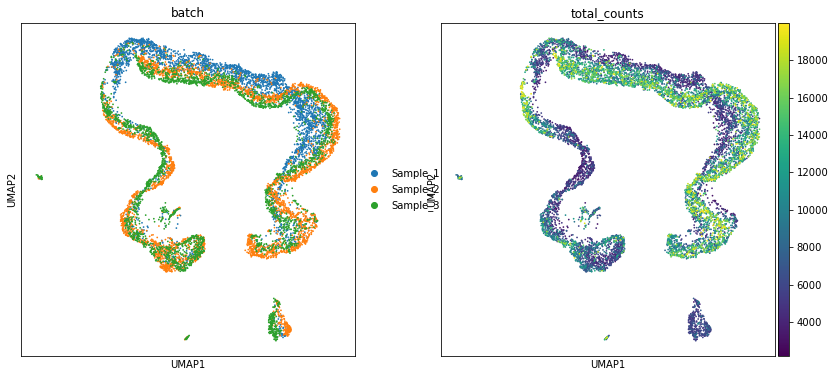

In [57]:
sc.plotting.umap(data, color=['batch','total_counts'])

In [32]:
data.write("step1.h5ad")

In [2]:
data = sc.read("step1.h5ad")

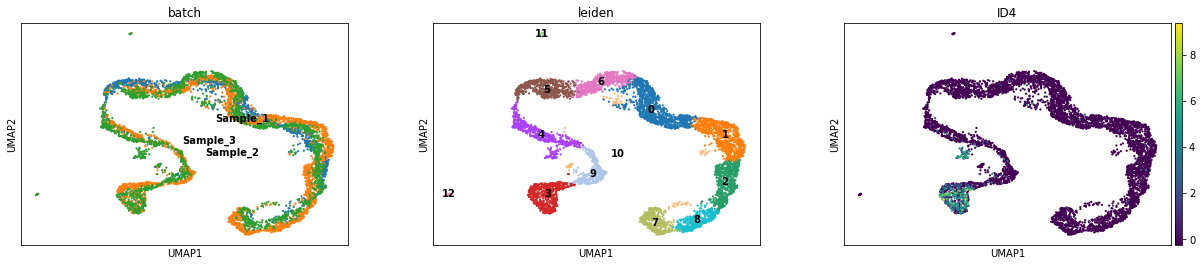

In [15]:
sc.tl.leiden(data, resolution=0.3, use_weights=True )

sc.plotting.umap(data, color=['batch','leiden','ID4'], legend_loc='on data')

In [16]:
data = data[ [i not in ['10','11','12'] for i in data.obs['leiden']] ].copy()

In [17]:
data.uns['iroot'] = np.flatnonzero(data.obs['leiden'] == '3')[0]

In [18]:
sc.tl.dpt(data)

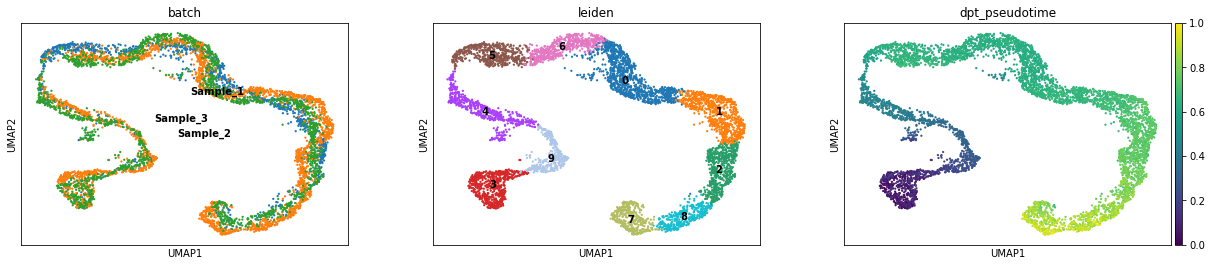

In [19]:
sc.plotting.umap(data, color=['batch','leiden','dpt_pseudotime'], legend_loc='on data')

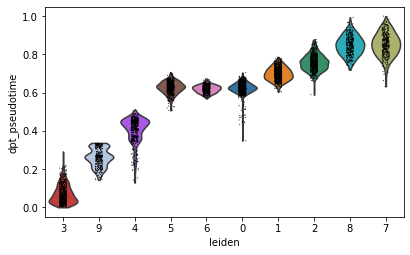

In [23]:
sc.pl.violin(data, groupby='leiden', keys='dpt_pseudotime', 
             order=['3','9','4','5','6','0','1','2','8','7'])

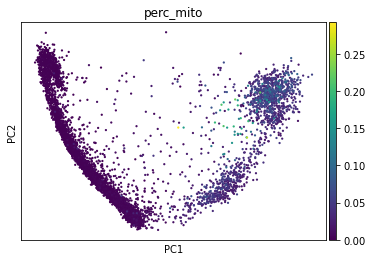

In [31]:
sc.plotting.pca(data, color=['perc_mito']) 

## Alternative Normalization

In [33]:
import rpy2
import logging
from rpy2.robjects import pandas2ri

In [34]:
%load_ext rpy2.ipython

In [35]:
rawMatrix = np.array( data.layers['raw_counts'].T.copy() )
genes_name = data.var_names
cells_info = data.obs[ ['batch','total_counts'] ].copy()

In [36]:
%%R -i cells_info -i rawMatrix -i genes_name
library(scater)
cell_df <- DataFrame(data = cells_info)
colnames(rawMatrix) <- rownames(cell_df) #cell names
rownames(rawMatrix) <- genes_name #gene names

R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowC

In [37]:
%%R
library(sctransform)
library(future)
future::plan(strategy = 'multicore', workers = 4)
options(future.globals.maxSize = 1003 * 1024 ^ 3)

R[write to console]: 
Attaching package: ‘future’


R[write to console]: The following object is masked from ‘package:SummarizedExperiment’:

    values


R[write to console]: The following object is masked from ‘package:GenomicRanges’:

    values


R[write to console]: The following object is masked from ‘package:IRanges’:

    values


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    values




In [38]:
%%R
cell_df[1:5,]

DataFrame with 5 rows and 2 columns
                          data.batch data.total_counts
                            <factor>         <numeric>
CTGCCTACACACCGAC-Sample_1   Sample_1             17961
AGGCCGTCACTTACGA-Sample_1   Sample_1             18632
CAGCTGGAGCTCCCAG-Sample_1   Sample_1             19267
GCTTGAACATGCCCGA-Sample_1   Sample_1             19425
GCGAGAAGTATAGGGC-Sample_1   Sample_1             19384


In [39]:
%%R
vst_out=vst( rawMatrix, cell_attr=cell_df, n_genes=5000, 
            method = "poisson", 
            #batch_var='data.batch', 
            min_cells=10,
            return_corrected_umi=TRUE)
#correct

R[write to console]: Calculating cell attributes from input UMI matrix: log_umi

R[write to console]: Variance stabilizing transformation of count matrix of size 28510 by 6064

R[write to console]: Model formula is y ~ log_umi

R[write to console]: Get Negative Binomial regression parameters per gene

R[write to console]: Using 5000 genes, 6064 cells



  |======================================================================| 100%


R[write to console]: Found 111 outliers - those will be ignored in fitting/regularization step


R[write to console]: Second step: Get residuals using fitted parameters for 28510 genes



  |======================================================================| 100%


R[write to console]: Computing corrected count matrix for 28510 genes



  |======================================================================| 100%


R[write to console]: Calculating gene attributes

R[write to console]: Wall clock passed: Time difference of 3.817489 mins



In [40]:
%%R -o new_matrix -o sct_genes -o all_genes -o corr_umi
new_matrix = vst_out$y
sct_genes = rownames(vst_out$model_pars)
all_genes = rownames(new_matrix)
corr_umi = as.matrix(vst_out$umi_corrected)

In [41]:
sct_genes = np.array(sct_genes)
all_genes = np.array(all_genes)

In [42]:
data.var['highly_variable'] = [i in sct_genes for i in data.var_names]
data = data[:,all_genes].copy()
data.layers['all_norm_sct'] = np.transpose( new_matrix )
data.layers['corr_umi'] = np.transpose( corr_umi )

In [43]:
data.X = data.layers['all_norm_sct'].copy()

In [44]:
sc.preprocessing.pca(data, svd_solver='arpack', random_state=12345)

In [45]:
data

AnnData object with n_obs × n_vars = 6064 × 28510
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'perc_mito', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'tpm_counts', 'log_counts', 'gauss_counts', 'all_norm_sct', 'corr_umi'
    obsp: 'distances', 'connectivities'

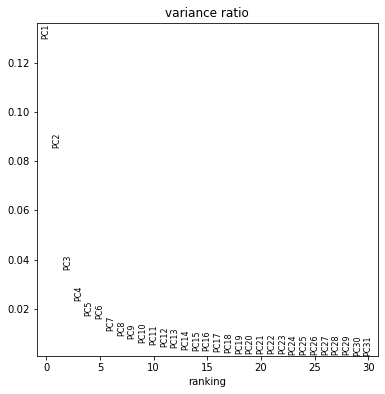

In [46]:
sc.plotting.pca_variance_ratio(data)

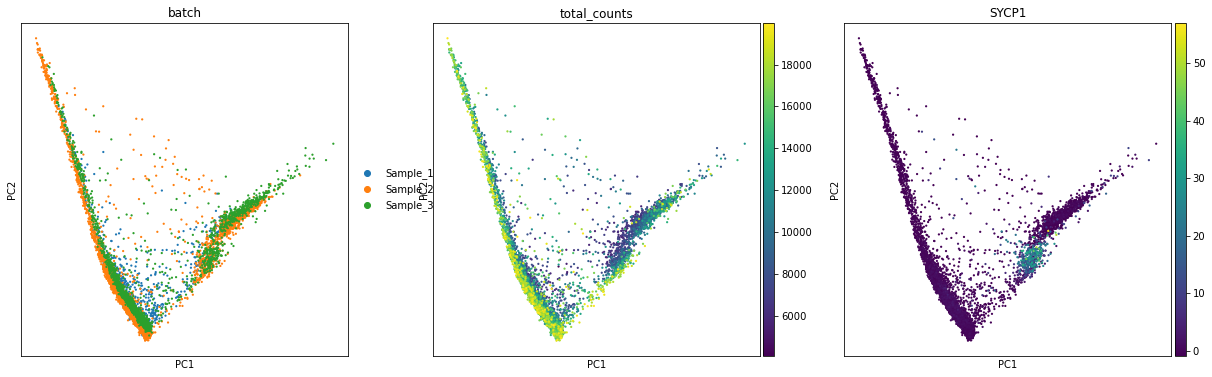

In [47]:
plt.rcParams['figure.figsize'] = (6,6) #reduce figure size
sc.pl.pca(data, color=['batch','total_counts','SYCP1'])

In [48]:
import bbknn
bbknn.bbknn(data,  batch_key='batch')

In [49]:
sc.tools.umap(data, random_state=1111, n_components=2)

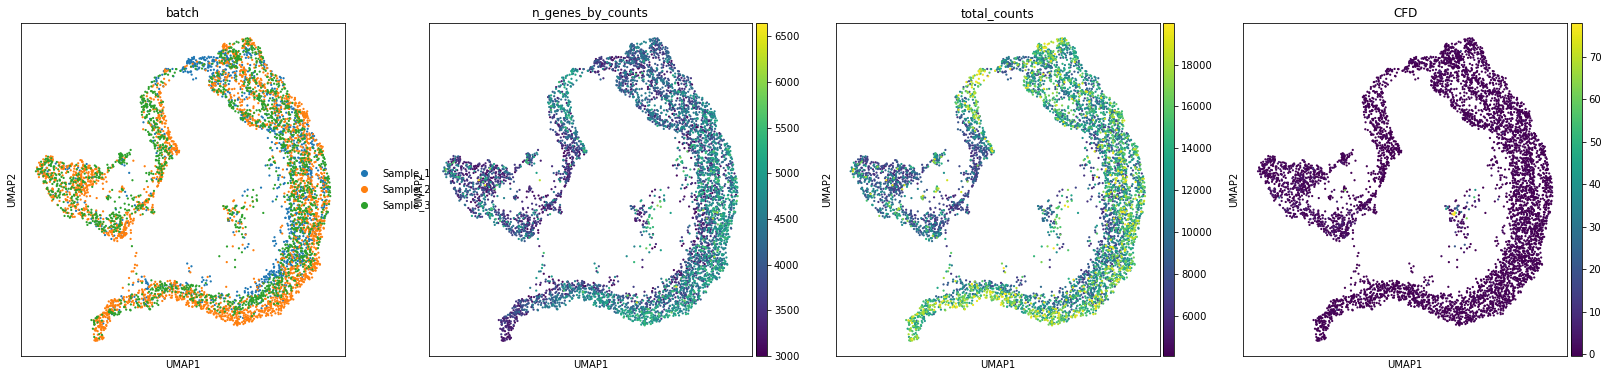

In [52]:
sc.plotting.umap(data, color=['batch','n_genes_by_counts','total_counts','CFD'])